In [1]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
sys.path.append('D:\API\cocoapi\PythonAPI')  # 你下载的 cocoapi 所在路径
import skimage.io as io
from pycocotools.coco import COCO   # 载入 cocoz
%matplotlib inline
CLASS=['tennis-court', 'container-crane', 'storage-tank', 'baseball-diamond', 'plane', 'ground-track-field', 'helicopter', 'airport', 'harbor', 'ship', 'large-vehicle', 'swimming-pool', 'soccer-ball-field', 'roundabout', 'basketball-court', 'bridge', 'small-vehicle', 'helipad']
#CLASS={'tennis-court', 'container-crane', 'storage-tank', 'baseball-diamond', 'plane', 'ground-track-field', 'helicopter', 'airport', 'harbor', 'ship', 'large-vehicle', 'swimming-pool', 'soccer-ball-field', 'roundabout', 'basketball-court', 'bridge', 'small-vehicle', 'helipad'}
class_to_ind = dict(zip(CLASS, range(len(CLASS))))
print(class_to_ind)
coco=COCO("./data/rscup/annotation/annos_rscup_val.json")

{'tennis-court': 0, 'container-crane': 1, 'storage-tank': 2, 'baseball-diamond': 3, 'plane': 4, 'ground-track-field': 5, 'helicopter': 6, 'airport': 7, 'harbor': 8, 'ship': 9, 'large-vehicle': 10, 'swimming-pool': 11, 'soccer-ball-field': 12, 'roundabout': 13, 'basketball-court': 14, 'bridge': 15, 'small-vehicle': 16, 'helipad': 17}
loading annotations into memory...
Done (t=1.65s)
creating index...
index created!


[16]
{'license': 1, 'file_name': 'P4151_1_5824.0_2080.0_part84.jpg', 'coco_url': 'xxx', 'height': 511.0, 'width': 511.0, 'date_captured': '2019-06-25', 'flickr_url': 'xxx', 'id': 282}
3


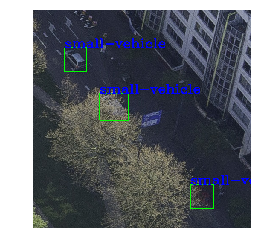

In [12]:
# get all images containing given categories, select one at random
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
sys.path.append('D:\API\cocoapi\PythonAPI')  # 你下载的 cocoapi 所在路径
import skimage.io as io
from pycocotools.coco import COCO   # 载入 cocoz
%matplotlib inline
CLASS=['tennis-court', 'container-crane', 'storage-tank', 'baseball-diamond', 'plane', 'ground-track-field', 'helicopter', 'airport', 'harbor', 'ship', 'large-vehicle', 'swimming-pool', 'soccer-ball-field', 'roundabout', 'basketball-court', 'bridge', 'small-vehicle', 'helipad']
#CLASS={'tennis-court', 'container-crane', 'storage-tank', 'baseball-diamond', 'plane', 'ground-track-field', 'helicopter', 'airport', 'harbor', 'ship', 'large-vehicle', 'swimming-pool', 'soccer-ball-field', 'roundabout', 'basketball-court', 'bridge', 'small-vehicle', 'helipad'}
class_to_ind = dict(zip(CLASS, range(len(CLASS))))
print(class_to_ind)
coco=COCO("./data/rscup/annotation/annos_rscup_val.json")
catIds = coco.getCatIds(catNms=['small-vehicle'])
print(catIds)
imgIds = coco.getImgIds(catIds=catIds)
# imgIds = coco.getImgIds(imgIds=[335328])
img = coco.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]
I = io.imread('./data/rscup/val/'+img['file_name'])
plt.imshow(I)
plt.axis('off')
print(img)
annIds = coco.getAnnIds(imgIds=[img['id']], iscrowd=None)
print(len(annIds))
anns = coco.loadAnns(annIds)
for ann in anns:
    bbox = ann['bbox']
    x = [int(x) for x in bbox]
    cv2.rectangle(I, (x[0],x[1]), (x[0]+x[2],x[1]+x[3]), (0,255,0), 2)
    cv2.putText(I, CLASS[ann['category_id']], (x[0],x[1]), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 2)
plt.imshow(I)
#coco.showAnns(anns)

In [2]:
from mmdet.datasets import augmentations as aug

In [3]:
rotate = aug.RandomRotate(degrees=50)


(3, 4)
(3, 4)
(3, 2, 2)
[[115.82635779 109.56046346]
 [158.54144482 164.92256059]]
[[168.84108452 234.07051031]
 [227.8122136  298.59494276]]
[[326.97049235 490.14311472]
 [372.36482522 547.65700156]]


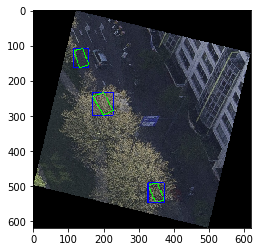

In [31]:
annIds = coco.getAnnIds(imgIds=[282], iscrowd=None)
anns = coco.loadAnns(annIds)
img = coco.loadImgs(282)[0]
I = io.imread('./data/rscup/val/'+img['file_name'])
boxes = []
polys = []
labels = []
for ann in anns:
    boxes.append(ann['bbox'])
    polys.append(ann['segmentation'])
    labels.append(ann['category_id'])
boxes = np.array(boxes)
print(boxes.shape)
boxes[:, 2] += boxes[:, 0]
boxes[:, 3] += boxes[:, 1]
print(boxes.shape)
boxes = np.reshape(boxes, (-1, 2,2))
print(boxes.shape)
polys = np.array(polys)
polys = np.squeeze(polys)
polys = np.resize(polys, (3, 4, 2))
I, polys, boxes, labels = rotate(I, polys, boxes, labels)
for poly, box in zip(polys, boxes):
    print(box)
    cv2.polylines(I, np.array(polys, np.int32), 1,(0,255,0), 2)
    cv2.rectangle(I, (int(box[0][0]),int(box[0][1])), (int(box[1][0]),int(box[1][1])), (0,0,255), 2)
plt.imshow(I)

In [9]:
a = np.array([1,1,1,1])
b = np.array([2,2,2,2])
print(np.stack(np.array([a,b]),axis=1))


[[1 2]
 [1 2]
 [1 2]
 [1 2]]
